<a href="https://colab.research.google.com/github/Praveen76/AcousticExtinguisherFire/blob/main/Sklearn_Pipeline_AcousticExtinguisherFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
import json
import os

# Set the Kaggle API key path
kaggle_key_path = '/content/drive/MyDrive/DS_Learning/.kaggle/kaggle.json'
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/DS_Learning/.kaggle'

# Check if the key is correctly set
with open(kaggle_key_path, 'r') as kaggle_key_file:
    kaggle_key_data = json.load(kaggle_key_file)
    print(f'Kaggle API username: {kaggle_key_data["username"]}')


Kaggle API username: praveen7851


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                 # For plotting data
import seaborn as sns                                           # For plotting data
from sklearn.model_selection import train_test_split            # For train/test splits
from sklearn.neighbors import KNeighborsClassifier              # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold         # Feature selector
from sklearn.pipeline import Pipeline                           # For setting up pipeline

# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV                # For optimization

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!kaggle datasets download -d muratkokludataset/acoustic-extinguisher-fire-dataset

  0% 0.00/621k [00:00<?, ?B/s]
100% 621k/621k [00:00<00:00, 116MB/s]


In [ ]:
#import zipfile module
from zipfile import ZipFile

with ZipFile('acoustic-extinguisher-fire-dataset.zip', 'r') as f:
  #extract in current directory
  f.extractall()

In [ ]:
#Load Dataset
df = pd.read_excel('./Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx', sheet_name='A_E_Fire_Dataset')
# Shape of dataframe
df.shape

(17442, 7)

In [ ]:
# Data Exploration and EDA
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [ ]:
### Segregating the dataframe into independent and the dependent features

In [ ]:
# The data matrix X
X = df.iloc[:, :-1]
# The labels
y = (df.iloc[:,-1:])

X.shape, y.shape

((17442, 6), (17442, 1))

In [ ]:
# Unique values in FUEL column
X['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

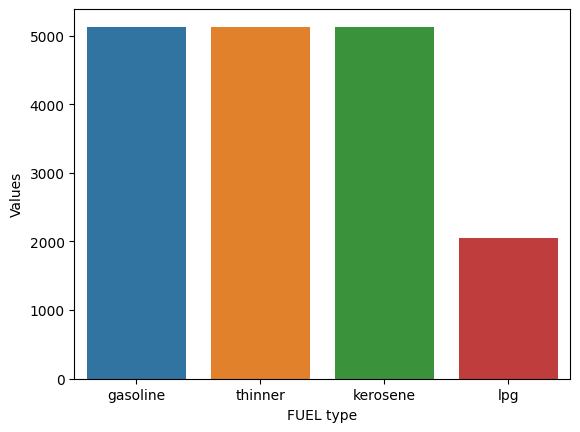

In [ ]:
# Plot unique values in FUEL column
uniques = X['FUEL'].value_counts()
sns.barplot(x = uniques.index, y = uniques.values)
plt.xlabel("FUEL type")
plt.ylabel("Values")
plt.show()

In [ ]:
# Ordinal encode input variable
ordinal = OrdinalEncoder()
X['FUEL'] = ordinal.fit_transform(X[['FUEL']])

In [ ]:
X['FUEL'].unique()

array([0., 3., 1., 2.])

In [ ]:
X.tail(110)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
17332,7,2.0,170,78,1.4,2
17333,7,2.0,170,76,0.0,1
17334,7,2.0,180,104,0.0,75
17335,7,2.0,180,97,0.0,72
17336,7,2.0,180,96,0.0,70
...,...,...,...,...,...,...
17437,7,2.0,190,86,2.2,5
17438,7,2.0,190,84,2.0,4
17439,7,2.0,190,80,1.5,3
17440,7,2.0,190,76,0.4,2


In [ ]:
X.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1,0.0,10,96,0.0,75
1,1,0.0,10,96,0.0,72
2,1,0.0,10,96,2.6,70
3,1,0.0,10,96,3.2,68
4,1,0.0,10,109,4.5,67


In [ ]:
y

,STATUS
0,0
1,1
2,1
3,1
4,1
...,...
17437,0
17438,0
17439,0
17440,0


In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,                  # predictors
                                                    y,                  # labels
                                                    test_size=1/3,      # test set size
                                                    random_state=0)     # set random number generator seed for reproducibility

print(X_train.shape)
print(X_test.shape)

(11628, 6)
(5814, 6)


In [ ]:
# Instantiate KNN classifier and fit on train set
knn = KNeighborsClassifier().fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(knn.score(X_train,y_train)))
print('Test set score: ' + str(knn.score(X_test,y_test)))

Training set score: 0.9422084623323014
Test set score: 0.9165806673546611


In [ ]:
# Setup pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('selector', VarianceThreshold()),
                 ('classifier', KNeighborsClassifier())
                 ])

In [ ]:
# Fit pipeline on train set
pipe.fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.9765221878224974
Test set score: 0.9614723082215342


In [ ]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'selector__threshold': [0, 0.001, 0.01],
			  'classifier__n_neighbors': [1, 3, 5, 7, 10],           # Number of neighbors to use by default for k-neighbors
			  'classifier__p': [1, 2],                               # Power parameter for the Minkowski metric
			  'classifier__leaf_size': [1, 5, 10, 15]                # Leaf size passed to BallTree or KDTree. This can affect the speed of the
			  }                                                      # construction and query, as well as the memory required to store the tree

**1.'scaler':** This is a hyperparameter for preprocessing data. It specifies different scaling techniques, such as StandardScaler, MinMaxScaler, Normalizer, and MaxAbsScaler. These scalers are used to preprocess the features before feeding them into the machine learning model. Grid search or randomized search can be used to determine which scaler works best for the given problem.

**2.'selector__threshold':** bold text** bold text** This is a hyperparameter for feature selection. It represents the threshold for feature selection methods. Feature selection is the process of choosing a subset of relevant features from the original feature set. The threshold controls which features are selected or excluded.

**3.'classifier__n_neighbors':** These are hyperparameters specific to the K-Nearest Neighbors (KNN) classifier.'n_neighbors' represents the number of nearest neighbors to consider when making a prediction.

**4. 'classifier__p':** Another hyperparameter for the KNN classifier, 'p' represents the power parameter for the Minkowski distance metric. The Minkowski distance metric is a generalization of Euclidean and Manhattan distances, and 'p' allows you to control the shape of the distance metric.

**5. 'classifier__leaf_size':** Yet another hyperparameter for the KNN classifier, 'leaf_size' represents the leaf size used for building the KD-Tree or Ball-Tree data structures. These data structures are used to speed up nearest neighbor searches.

In [ ]:
# Instantiate GridSearchCV
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

# Performance on train and test sets
print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 0.9800481596147231
Test set score: 0.9685242518059856


In [ ]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__leaf_size': 15, 'classifier__n_neighbors': 5, 'classifier__p': 1, 'scaler': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', KNeighborsClassifier(leaf_size=15, p=1))])


In [ ]:
# Create a dataframe
result_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__n_neighbors',
       'param_classifier__p', 'param_scaler', 'param_selector__threshold',
       'params', 'split0_test_score', 'split1_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


The above dataframe contains scores for different parameters, for instance, the column called "mean_test_score" is the average of the scores on the test set for all the folds during CV.

In [ ]:
result_df.shape

(480, 15)

In [ ]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017861,0.000811,0.500563,0.021803,1,1,1,StandardScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,337
1,0.021032,0.004311,0.452349,0.012994,1,1,1,StandardScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,337
2,0.016754,0.000314,0.474694,0.046861,1,1,1,StandardScaler(),0.01,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.946508,0.947196,0.946852,0.000344,337
3,0.016504,0.000028,0.482984,0.049876,1,1,1,MinMaxScaler(),0,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.949776,0.951840,0.950808,0.001032,205
4,0.015874,0.000055,0.508426,0.029827,1,1,1,MinMaxScaler(),0.001,"{'classifier__leaf_size': 1, 'classifier__n_ne...",0.949776,0.951840,0.950808,0.001032,205


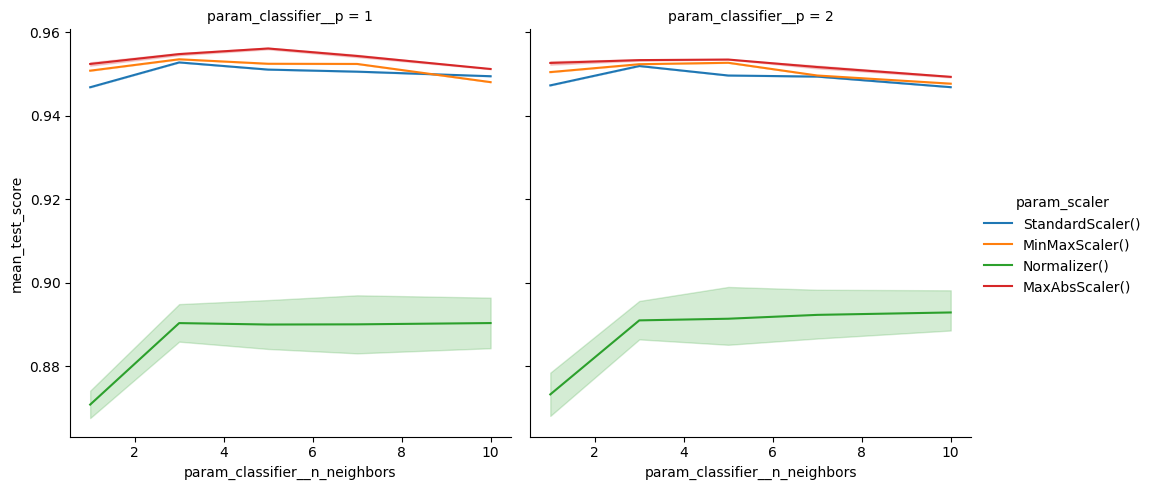

In [ ]:
# Let’s see how `n_neighbors` affect the performance for different `scalers`, and for different values of `p`.

sns.relplot(data = result_df,
            kind = 'line',
			x = 'param_classifier__n_neighbors',
			y = 'mean_test_score',
			hue = 'param_scaler',
			col = 'param_classifier__p')
plt.show()

From the above plots, it can be seen that:
  1.   For both p = 1 and 2, worst performing scaler method is Normalizer()
  2.   For both p = 1 and 2, best performing scaler is MaxAbsScaler()
  3.   For p = 1 and scaler = MaxAbsScaler(), there is a peak in mean_test_score
at n_neighbors = 5.


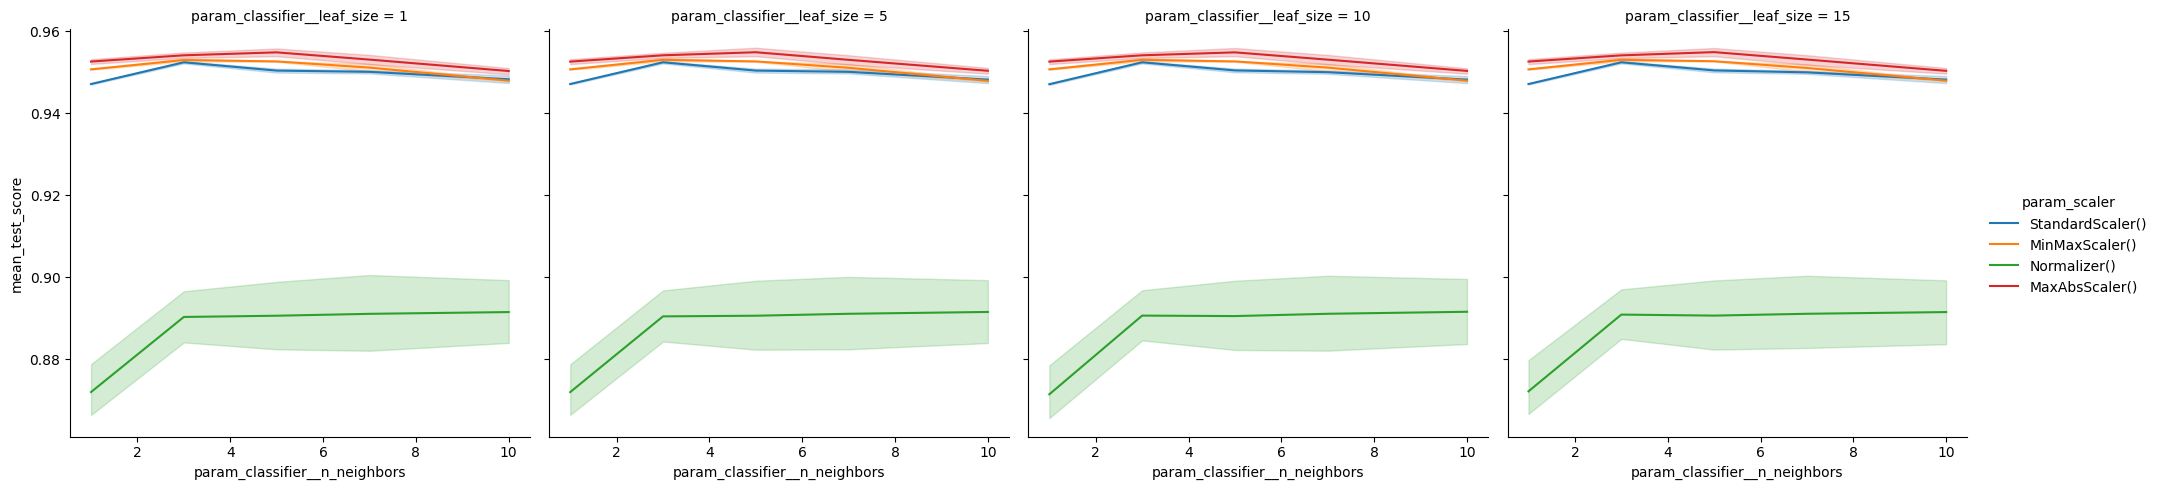

In [ ]:
#  Let’s see how n_neighbors affect the performance for different scalers, and for different values of leaf_size.
sns.relplot(data = result_df,
            kind = 'line',
            x = 'param_classifier__n_neighbors',
            y = 'mean_test_score',
            hue = 'param_scaler',
            col = 'param_classifier__leaf_size')
plt.show()

From above plots, observations as follows

1. For all the leaf_size parameters, that is 1, 5, 10, 15, worst performing scaler method is Normalizer().
2. For all the leaf_size parameters, best performing scaler is MaxAbsScaler().
3. For all the leaf_size parameters, there is a peak at n_neighbors = 5.

**Note :** MaxAbsScaler() is performing well because it scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be  1.0 . It does not shift or center the data, and thus does not destroy any sparsity.

